In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Load dataset
df = pd.read_csv(r"C:\Users\yoges\OneDrive\Desktop\customer_booking.csv", encoding="ISO-8859-1")

In [5]:
#Display basic dataset info
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 rows:\n", df.head())

# Encode categorical variables
categorical_cols = ["sales_channel", "trip_type", "flight_day", "route", "booking_origin"]
df_encoded = df.copy()

for col in categorical_cols:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Define features and target
X = df_encoded.drop(columns=["booking_complete"])  # Features
y = df_encoded["booking_complete"]  # Target variable (1 = booked, 0 = not booked)

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
m

In [6]:
# Split dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("\nModel Evaluation:")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)



Model Evaluation:
Accuracy: 0.854

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92      8504
           1       0.57      0.10      0.18      1496

    accuracy                           0.85     10000
   macro avg       0.71      0.54      0.55     10000
weighted avg       0.82      0.85      0.81     10000


Confusion Matrix:
 [[8385  119]
 [1341  155]]


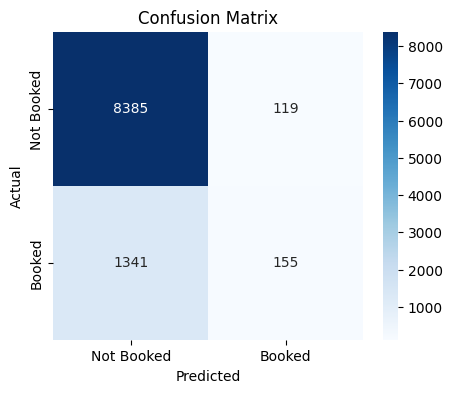

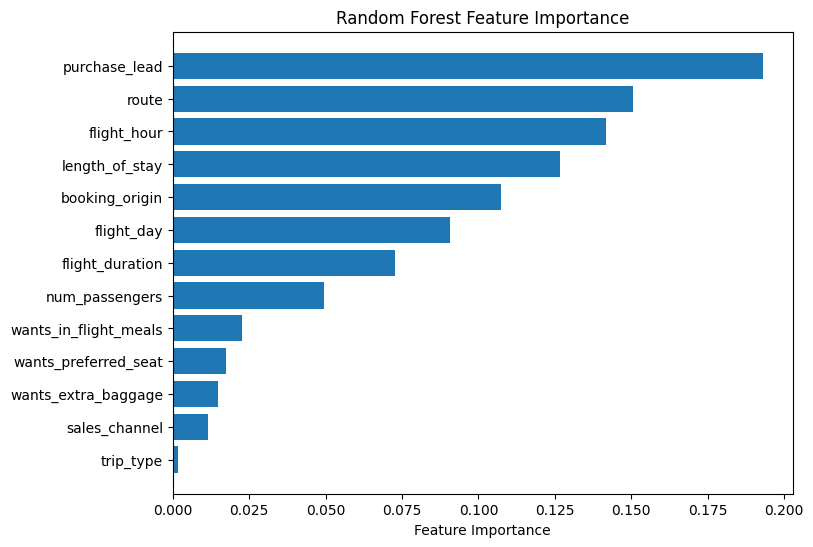

In [7]:
# Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Booked", "Booked"], yticklabels=["Not Booked", "Booked"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance Visualization
feature_importances = model.feature_importances_
feature_names = X.columns

# Sort feature importance values
sorted_idx = np.argsort(feature_importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()